In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('Final_Data_Set.csv')

In [10]:
data

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,110,80,1,1,0,0,1,0,50,22.0
1,1,140,90,3,1,0,0,1,1,55,34.9
2,1,130,70,3,1,0,0,0,1,52,23.5
3,2,150,100,1,1,0,0,1,1,48,28.7
4,1,100,60,1,1,0,0,0,0,48,23.0
...,...,...,...,...,...,...,...,...,...,...,...
68606,2,120,80,1,1,1,0,1,0,53,26.9
68607,1,140,90,2,2,0,0,1,1,62,50.5
68608,2,180,90,3,1,0,1,0,1,52,31.4
68609,1,135,80,1,2,0,0,0,1,61,27.1


In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('cardio', axis=1)
y = data['cardio']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Base model
base_model = DecisionTreeClassifier(random_state=42)

# Bagging model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [13]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy(%): {accuracy * 100:.2f}%")


Accuracy(%): 67.17%


In [14]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

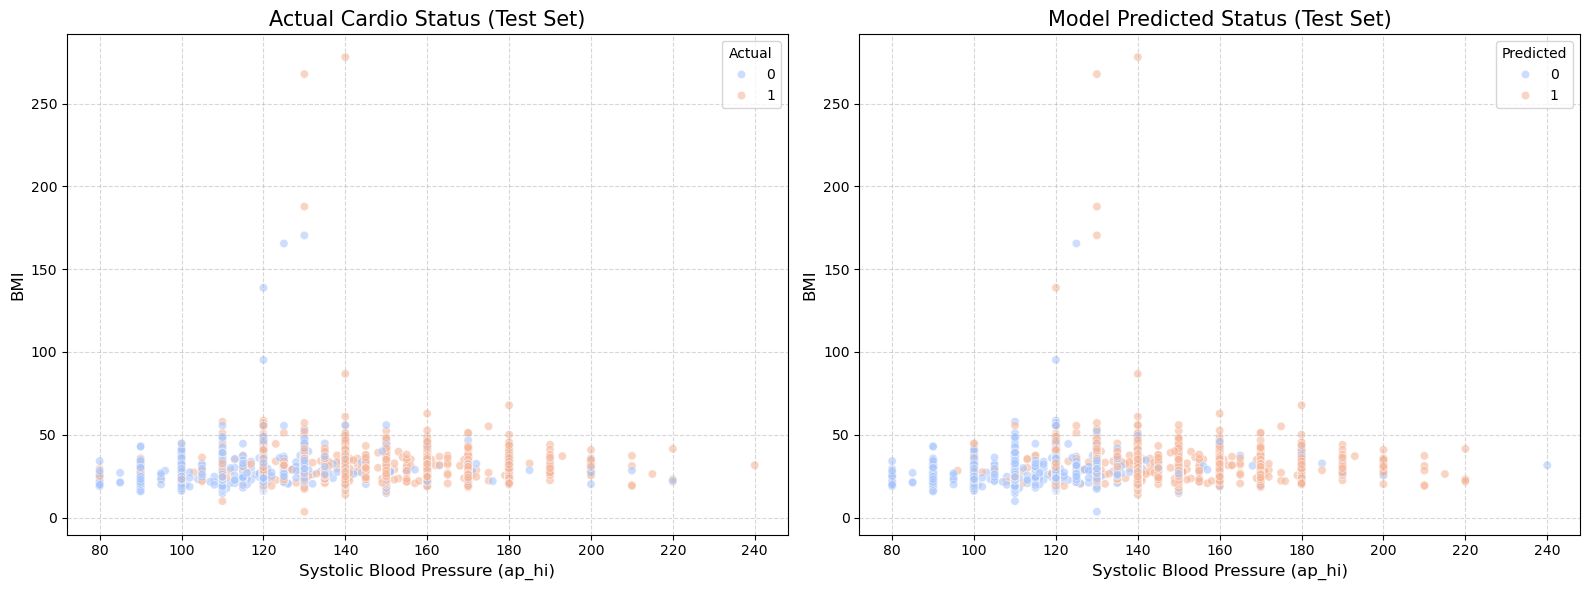

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a temporary DataFrame for plotting from your test sets
plot_df = X_test.copy()
plot_df['Actual'] = y_test.values
plot_df['Predicted'] = y_pred

# 2. Set up the figure with two subplots
plt.figure(figsize=(16, 6))

# Plot 1: Actual Labels
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='ap_hi', y='bmi', hue='Actual', 
                palette='coolwarm', alpha=0.6)
plt.title('Actual Cardio Status (Test Set)', fontsize=15)
plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 2: Model Predictions
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='ap_hi', y='bmi', hue='Predicted', 
                palette='coolwarm', alpha=0.6)
plt.title('Model Predicted Status (Test Set)', fontsize=15)
plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

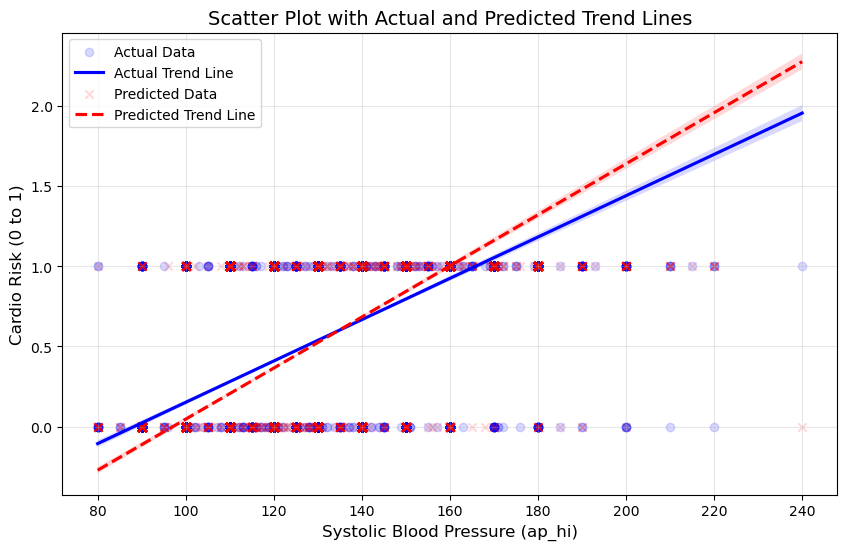

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 1. Plot Actual Points and the Actual Trend Line (Blue)
sns.regplot(x=X_test['ap_hi'], y=y_test, color='blue', 
            scatter_kws={'alpha':0.15}, line_kws={'label': 'Actual Trend Line'}, 
            label='Actual Data')

# 2. Plot Predicted Points and the Predicted Trend Line (Red)
sns.regplot(x=X_test['ap_hi'], y=y_pred, color='red', marker='x', 
            scatter_kws={'alpha':0.15}, line_kws={'label': 'Predicted Trend Line', 'linestyle': '--'}, 
            label='Predicted Data')

plt.title('Scatter Plot with Actual and Predicted Trend Lines', fontsize=14)
plt.xlabel('Systolic Blood Pressure (ap_hi)', fontsize=12)
plt.ylabel('Cardio Risk (0 to 1)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()